In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [2]:
df_encoded = pd.read_csv('../Data/dataset.csv')
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in ["Area","Item"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop(columns=["hg/ha_yield"])
y = df_encoded["hg/ha_yield"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

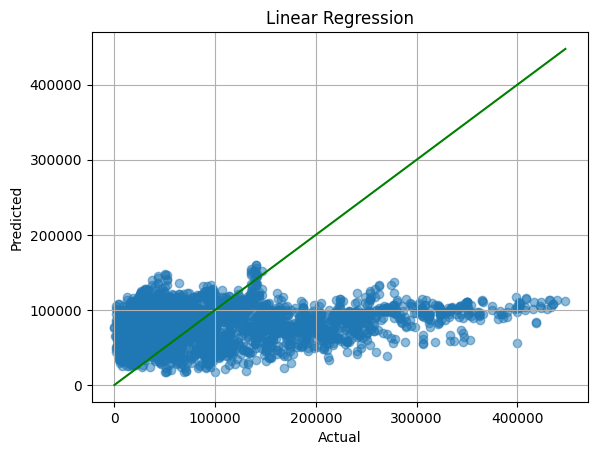

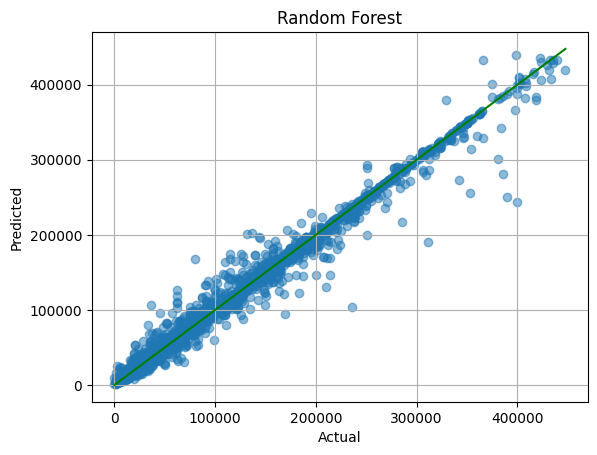

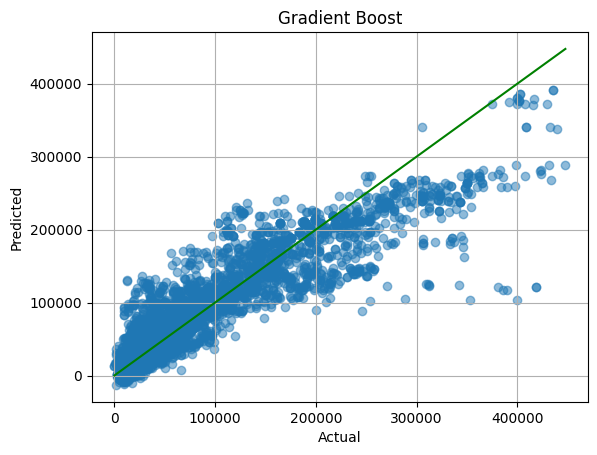

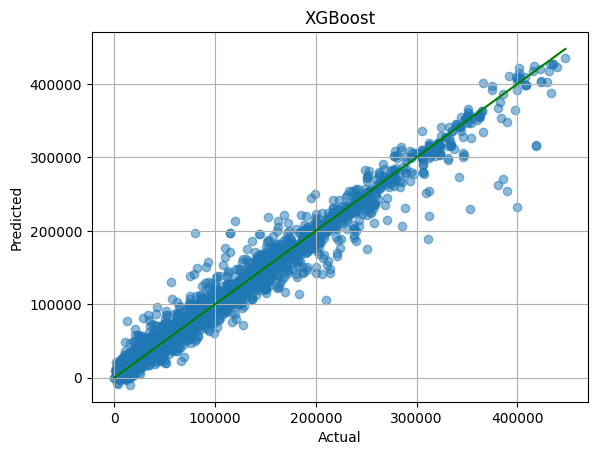

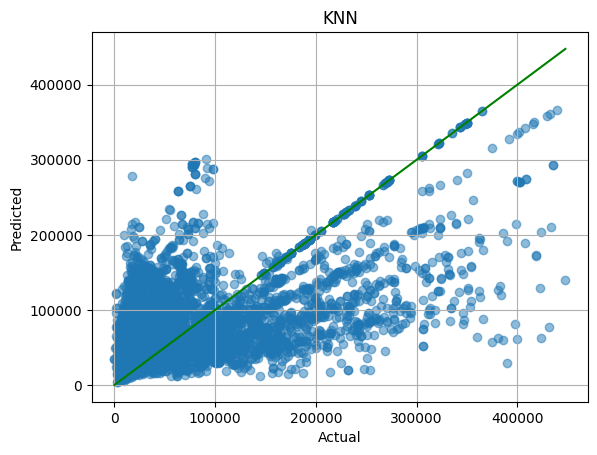

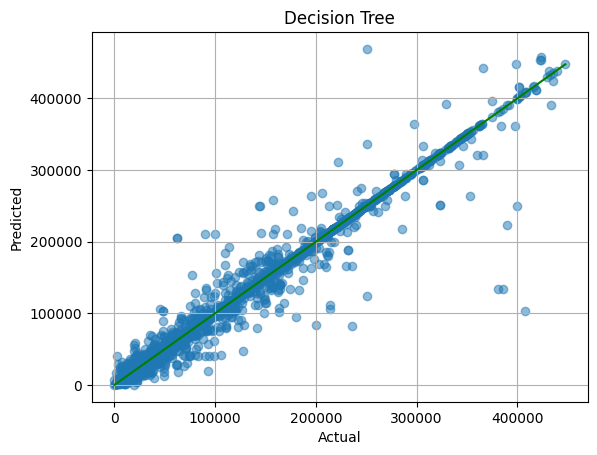

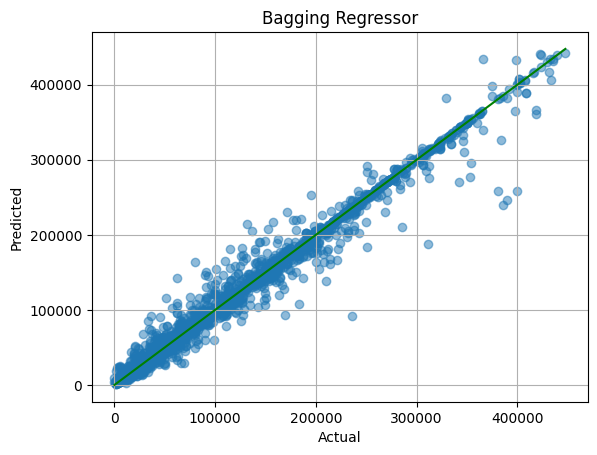

{'Linear Regression': {'Train': 0.07409034181588192,
  'Test': 0.073047931731821},
 'Random Forest': {'Train': 0.9981191660997984, 'Test': 0.9883594834354424},
 'Gradient Boost': {'Train': 0.8418257809326329, 'Test': 0.831863042100365},
 'XGBoost': {'Train': 0.9883469343185425, 'Test': 0.977685272693634},
 'KNN': {'Train': 0.579989534391209, 'Test': 0.3160268140379372},
 'Decision Tree': {'Train': 1.0, 'Test': 0.9749414079688072},
 'Bagging Regressor': {'Train': 0.9972431277283724,
  'Test': 0.9862003645389018}}

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

models = {
"Linear Regression": LinearRegression(),
"Random Forest": RandomForestRegressor(random_state=42),
"Gradient Boost": GradientBoostingRegressor(random_state=42),
"XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
"KNN": KNeighborsRegressor(),
"Decision Tree": DecisionTreeRegressor(random_state=42),
"Bagging Regressor": BaggingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    results[name] = {
    "Train": r2_score(y_train, y_pred_train),
    "Test": r2_score(y_test, y_pred_test)
    }
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="green")
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

results

In [4]:
results_df = pd.DataFrame([
    {"Model": name, "Train R²": values["Train"], "Test R²": values["Test"]}
    for name, values in results.items()
]).sort_values("Test R²", ascending=False).reset_index(drop=True)

def highlight_extremes(val):
    if val == results_df["Test R²"].max():
        return "background-color: lightgreen"
    elif val == results_df["Test R²"].min():
        return "background-color: salmon"
    return ""

results_df.style.applymap(highlight_extremes, subset=["Test R²"])


AttributeError: The '.style' accessor requires jinja2

In [ ]:
feature_names = X_train.columns
random_input = {
f: np.random.uniform(X_train[f].min(), X_train[f].max()) if X_train[f].dtype != "int64"
else np.random.randint(X_train[f].min(), X_train[f].max()+1)
for f in feature_names
}
random_sample = pd.DataFrame([random_input])
best_model = models["Random Forest"]
predicted = best_model.predict(random_sample)[0]
yield_median = y.median()
yield_class = "Yes" if predicted >= yield_median else "No"

predicted, yield_class